In [8]:
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Zalando's fashion MNIST alternative:

https://github.com/zalandoresearch/fashion-mnist

|Label	|Description|
|-------|-----------|
|0	|T-shirt/top|
|1	|Trouser|
|2	|Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path,
                               f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)
    
    # for flat arrays:
    # with gzip.open(images_path, 'rb') as imgpath:
    #     images = np.frombuffer(imgpath.read(), dtype=np.uint8,
    #                            offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

In [5]:
X_train.shape

(60000, 28, 28)

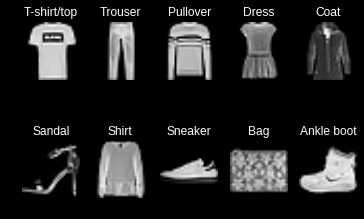

In [10]:
labels = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot']

for i, label in enumerate(labels):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[np.min(np.where(y_train == i))], 
               cmap='gray', 
               interpolation='bilinear')
    plt.title(label)
    plt.axis('off')

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
input_shape = (28, 28, 1)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [12]:
n_classes = 10

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [13]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)

model_train = model.fit(X_train, Y_train,
                        batch_size=128, 
                        epochs=3,
                        verbose=0,
                        callbacks=[early_stopping_monitor],
                        validation_data=(X_test, Y_test))

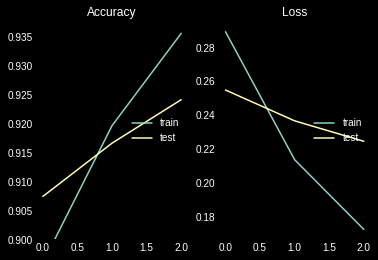

In [17]:
plt.subplot(1, 2, 1)
plt.plot(model_train.history['acc'], label='train')
plt.plot(model_train.history['val_acc'], label='test')
plt.title('Accuracy')
plt.legend(loc='center right')
plt.ylim(0.9, )

plt.subplot(1, 2, 2)
plt.plot(model_train.history['loss'], label='train')
plt.plot(model_train.history['val_loss'], label='test')
plt.title('Loss')
plt.legend(loc='center right');

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.224367019507
Test accuracy: 0.9241


In [20]:
Y_pred = model.predict_classes(X_test, verbose=0)

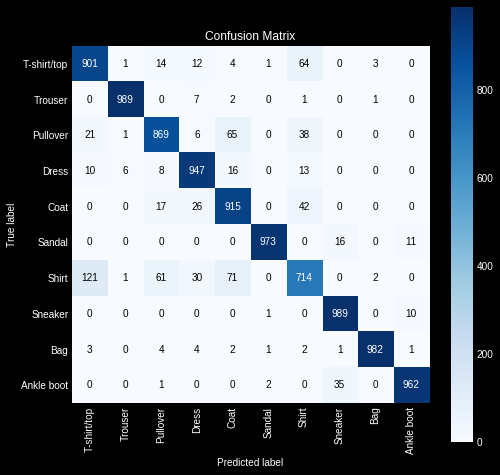

In [21]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(Y_test.argmax(1), Y_pred, figsize=(8, 8))
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels);